## 下載資料

In [1]:
! gdown https://drive.google.com/uc?id=1Fblgi9CmNoRoY6tjV7zedIT5r5UlzUro

Downloading...
From: https://drive.google.com/uc?id=1Fblgi9CmNoRoY6tjV7zedIT5r5UlzUro
To: /content/data_edited_2018.csv
100% 854k/854k [00:00<00:00, 57.9MB/s]


## 讀取資料

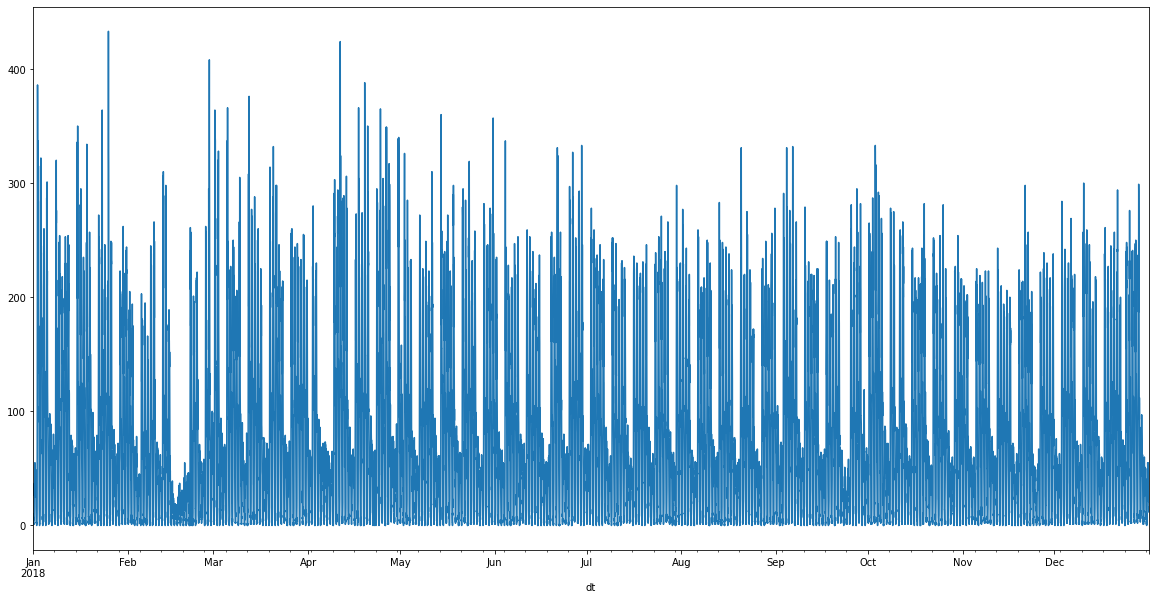

In [2]:
%matplotlib inline
import pandas
df = pandas.read_csv('data_edited_2018.csv')
df['dt'] = df['date'] + ' ' + df['time']
df['dt'] = pandas.to_datetime(df['dt'], format = '%Y/%m/%d %H:%M')
df.set_index('dt', inplace=True)
df['y'].plot(kind = 'line', figsize = [20,10])

## 資料預處理

In [ ]:
df['sms'] = df['sms'].fillna(0)

In [ ]:
df['hour'] = df.index.hour 
df['dayofweek'] = df.index.dayofweek
df['season'] = (df.index.month%12 + 3)//3 

In [ ]:
df = df[['y', 'sms','hour','dayofweek','month', 'season', 'workday']]

In [ ]:
df.head(3)

,y,sms,hour,dayofweek,month,season,workday
dt,,,,,,,
2018-01-01 00:00:00,10,0.0,0,0,1,1,0
2018-01-01 00:30:00,6,0.0,0,0,1,1,0
2018-01-01 01:00:00,4,0.0,1,0,1,1,0


##  轉換虛擬變數

In [ ]:
columns_to_cat = ['sms','hour', 'dayofweek', 'month','season']
df[columns_to_cat] = df[columns_to_cat].astype('category')

data = pandas.get_dummies(df, columns=columns_to_cat) 
data.head(3)

,y,workday,sms_0.0,sms_1.0,sms_2.0,sms_3.0,sms_4.0,hour_0,hour_1,hour_2,...,month_7,month_8,month_9,month_10,month_11,month_12,season_1,season_2,season_3,season_4
dt,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,10,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2018-01-01 00:30:00,6,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2018-01-01 01:00:00,4,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
data.columns

Index(['y', 'workday', 'sms_0.0', 'sms_1.0', 'sms_2.0', 'sms_3.0', 'sms_4.0',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'dayofweek_0',
       'dayofweek_1', 'dayofweek_2', 'dayofweek_3', 'dayofweek_4',
       'dayofweek_5', 'dayofweek_6', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'season_1', 'season_2', 'season_3',
       'season_4'],
      dtype='object')

In [ ]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

## 訓練與測試資料集

In [ ]:
split_index = int(len(X)*0.8)

X_train_values = X[:split_index] 
X_test_values = X[split_index:] 

In [ ]:
y_train = y[:split_index] 
y_test = y[split_index:] 

## 資料標準化

In [ ]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler(with_mean=True, with_std=True).fit(X_train_values)

X_train = scalerX.transform(X_train_values)
X_test = scalerX.transform(X_test_values)


In [ ]:
X_train.shape,X_test.shape, y_train.shape


((14016, 53), (3504, 53), (14016,))

## 建立迴歸模型

In [ ]:
%%time

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
#model = LinearRegression()
model =GradientBoostingRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


CPU times: user 986 ms, sys: 25.3 ms, total: 1.01 s
Wall time: 1.04 s


In [ ]:
y_pred = model.predict(X_test)
y_true = y_test.values.reshape(y_test.shape[0], 1)

split_index = int(data.shape[0]*0.8)
x = data[split_index:]

datetime_difference = len(x) - len(y_true)

## 評估預測結果

Text(0.5, 1.0, 'MVLR result \n MSE = 16198895.37 \n MAPE = 1093174.5 [%] \n SMAPE = 94514.8 [%]')

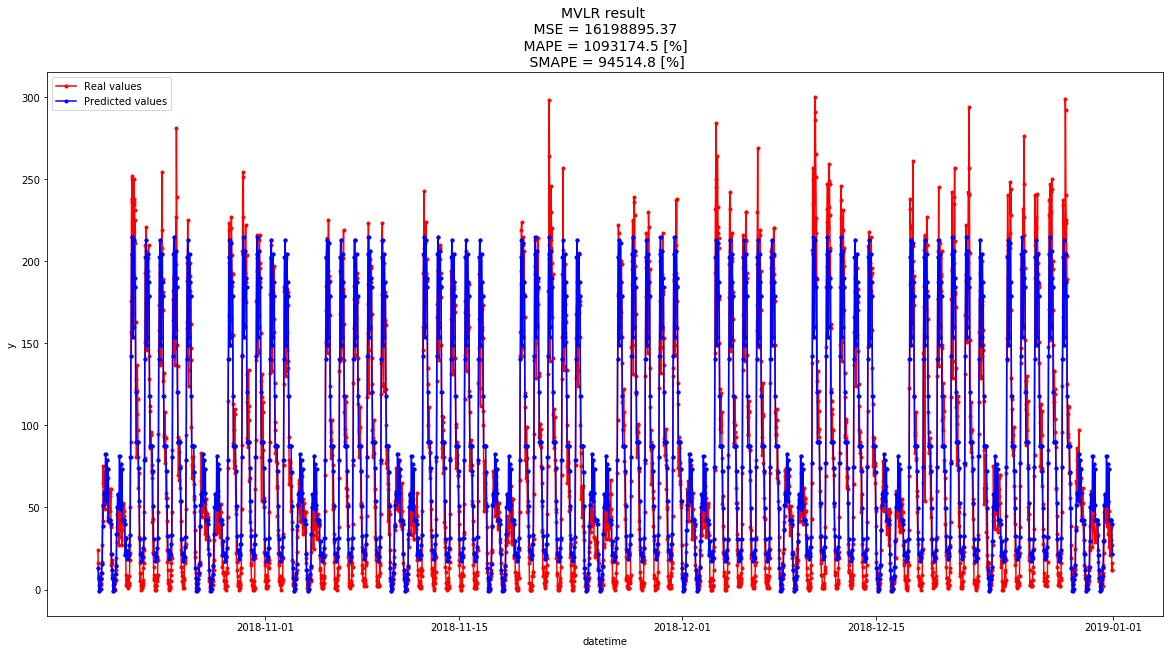

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize=(20,10))
plt.plot(x.index, y_true, '.-', color='red', label='Real values')
plt.plot(x.index, y_pred, '.-', color='blue', label='Predicted values')

plt.ylabel('y')
plt.xlabel('datetime') 

plt.legend()

n = len(y_pred) + len(y_true)

# 計算 mse, mape, smape
mse_result = (1/n)*np.sum((y_pred - y_true)**2)
mape_result = (100/n) * np.sum(np.abs((y_true - y_pred) / y_pred))
smape_result = (100/n) * np.sum( np.abs((y_true - y_pred)) / (np.abs(y_true) + np.abs(y_pred)) )

plt.title('MVLR result \n MSE = %.2f \n MAPE = %.1f [%%] \n SMAPE = %.1f [%%]' % (mse_result, mape_result, smape_result), fontsize = 14)


## 以天為單位比對預測結果

In [ ]:
test_size = 0.8
split_index = int(data.shape[0]*test_size)
x = data[split_index:]

# 修正預測跟實際值差距的數值
datetime_difference = len(x) - len(y_true)
x = x[datetime_difference:] 

# 比對預測與實際值
datetime = x.index

results = pandas.DataFrame(y_true, y_pred) 
result = results.reset_index() 
result.columns = ['y_pred', 'y_true']
result['datetime'] = datetime
result = result.set_index(['datetime'])

# 重新取樣
result = result.resample('D').sum()
# 去除Nan
result = result.dropna()

In [ ]:
# 比較預測與實際值

ytrue = result['y_true']
ypred = result['y_pred']
n = len(result)

mse = (1/n)*np.sum((ypred - ytrue)**2)
mape = (100/n) * np.sum(np.abs((ytrue - ypred) / ypred))
smape = (100/n) * np.sum( np.abs((ytrue - ypred)) / (np.abs(ytrue) + np.abs(ypred)) )

Text(0.5, 1.0, 'Seq2Seq By Day \n MSE = 185212.54 \n MAPE = 10.6 [%] \n SMAPE = 5.7 [%]')

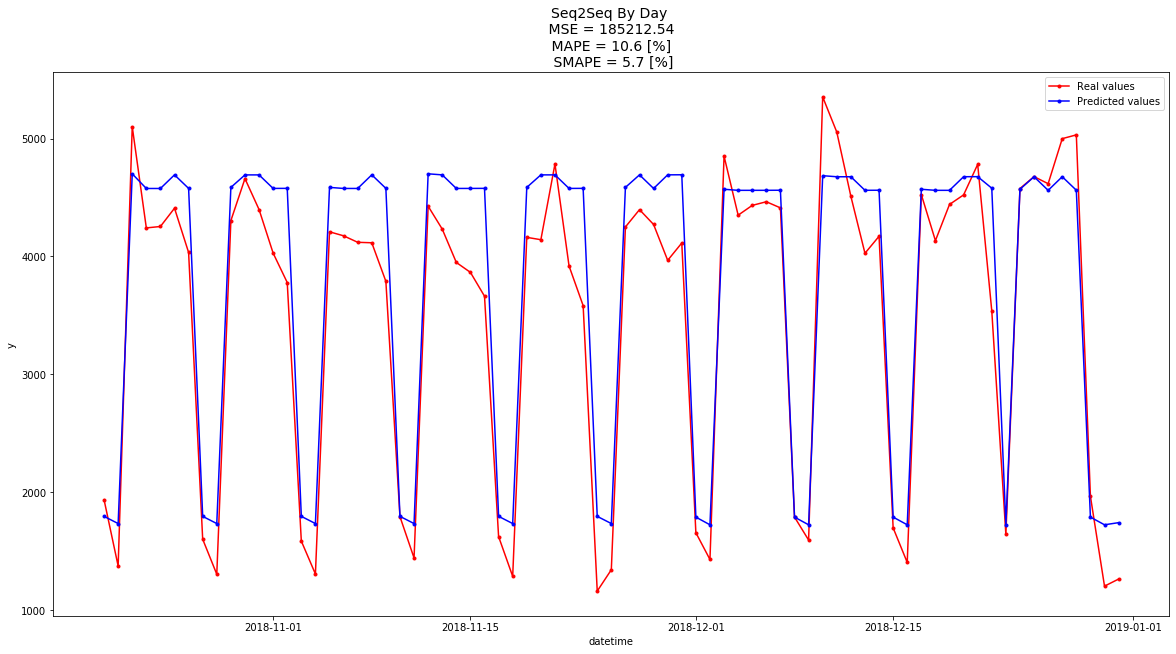

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(result.index, result['y_true'], '.-', color='red', label='Real values') 
plt.plot(result.index, result['y_pred'], '.-', color='blue', label='Predicted values')

plt.ylabel('y')
plt.xlabel('datetime')
plt.legend()

plt.title('Seq2Seq By Day \n MSE = %.2f \n MAPE = %.1f [%%] \n SMAPE = %.1f [%%]' % (mse, mape, smape), fontsize = 14)